In [ ]:
!pip install fredapi

In [ ]:
!python -m pip install prophet

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from prophet import Prophet
from fastai.tabular.all import *
from sklearn.ensemble import RandomForestRegressor
import cred #This file contain api so we are using it because of security reason


plt.style.use('fivethirtyeight')
color_pal = plt.rcParams["axes.prop_cycle"].by_key()["color"]

from fredapi import Fred

fred_key = cred.fred_api

#Let's look at the data

In [4]:
fred = Fred(api_key=fred_key)

In [5]:
sp_search = fred.search('S&P')

In [6]:
sp_search

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
SP500,SP500,2023-09-06,2023-09-06,S&P 500,2013-09-06,2023-09-05,"Daily, Close",D,Index,Index,Not Seasonally Adjusted,NSA,2023-09-05 19:11:06-05:00,82,"The observations for the S&P 500 represent the daily index value at market close. The market typically closes at 4 PM ET, except for holidays when it sometimes closes early. The Federal Reserve Bank of St. Louis and S&P Dow Jones Indices LLC have reached a new agreement on the use of Standard & Poors and Dow Jones Averages series in FRED. FRED and its associated services will include 10 years of daily history for Standard & Poors and Dow Jones Averages series. The S&P 500 is regarded as a gauge of the large cap U.S. equities market. The index includes 500 leading companies in leading ind..."
VXVCLS,VXVCLS,2023-09-06,2023-09-06,CBOE S&P 500 3-Month Volatility Index,2007-12-04,2023-09-01,"Daily, Close",D,Index,Index,Not Seasonally Adjusted,NSA,2023-09-05 08:36:09-05:00,53,"Copyright, 2016, Chicago Board Options Exchange, Inc. Reprinted with permission."
CSUSHPINSA,CSUSHPINSA,2023-09-06,2023-09-06,S&P/Case-Shiller U.S. National Home Price Index,1987-01-01,2023-06-01,Monthly,M,Index Jan 2000=100,Index Jan 2000=100,Not Seasonally Adjusted,NSA,2023-08-29 08:11:02-05:00,90,"For more information regarding the index, please visit Standard & Poor's (https://www.spglobal.com/spdji/en/documents/methodologies/methodology-sp-corelogic-cs-home-price-indices.pdf). There is more information about home price sales pairs in the Methodology section. Copyright, 2016, Standard & Poor's Financial Services LLC. Reprinted with permission."
CSUSHPISA,CSUSHPISA,2023-09-06,2023-09-06,S&P/Case-Shiller U.S. National Home Price Index,1987-01-01,2023-06-01,Monthly,M,Index Jan 2000=100,Index Jan 2000=100,Seasonally Adjusted,SA,2023-08-29 08:11:04-05:00,80,"For more information regarding the index, please visit Standard & Poor's (https://www.spglobal.com/spdji/en/documents/methodologies/methodology-sp-corelogic-cs-home-price-indices.pdf). There is more information about home price sales pairs in the Methodology section. Copyright, 2016, Standard & Poor's Financial Services LLC. Reprinted with permission."
VXOCLS,VXOCLS,2023-09-06,2023-09-06,CBOE S&P 100 Volatility Index: VXO (DISCONTINUED),1986-01-02,2021-09-23,"Daily, Close",D,Index,Index,Not Seasonally Adjusted,NSA,2021-09-24 08:36:03-05:00,26,"This series is no longer being updated by the source. More information regarding the changes may be found on both the initial</> and <a href=""https://cdn.cboe.com/resources/release_notes/2021/VXO-and-VXHYG-Indices-Consultation-Notice-Final-_v3.pdf""> the final (https://cdn.cboe.com/resources/release_notes/2021/VXO-and-VXHYG-Indices-Consultation-Summary.pdf) announcement pages."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
CSHMCPCFA156NRUG,CSHMCPCFA156NRUG,2023-09-06,2023-09-06,Share of Merchandise Imports at Current Purchasing Power Parities for Central African Republic,1960-01-01,2019-01-01,Annual,A,Percent,%,Not Seasonally Adjusted,NSA,2021-11-08 13:37:36-06:00,3,"Source ID: csh_m When using these data in your research, please make the following reference: Feenstra, Robert C., Robert Inklaar and Marcel P. Timmer (2015), ""The Next Generation of the Penn World Table"" American Economic Review, 105(10), 3150-3182, available for download at www.ggdc.net/pwt For more information, see http://www.rug.nl/research/ggdc/data/pwt/."
CKSPPPMKA666NRUG,CKSPPPMKA666NRUG,2023-09-06,2023-09-06,Capital stock at Current Purchasing Power Parities for the former Yugoslav Republic of Macedonia,1990-01-01,2019-01-01,Annual,A,Millions of 2017 U.S. Dollars,Mil. of 2017 U.S. $,Not Seasonally Adjusted,NSA,2023-02-27 14:33:36-06:00,3,"Source ID: ck When using these data in your research, please make the followin

### House Price

<Axes: title={'center': 'House price'}>

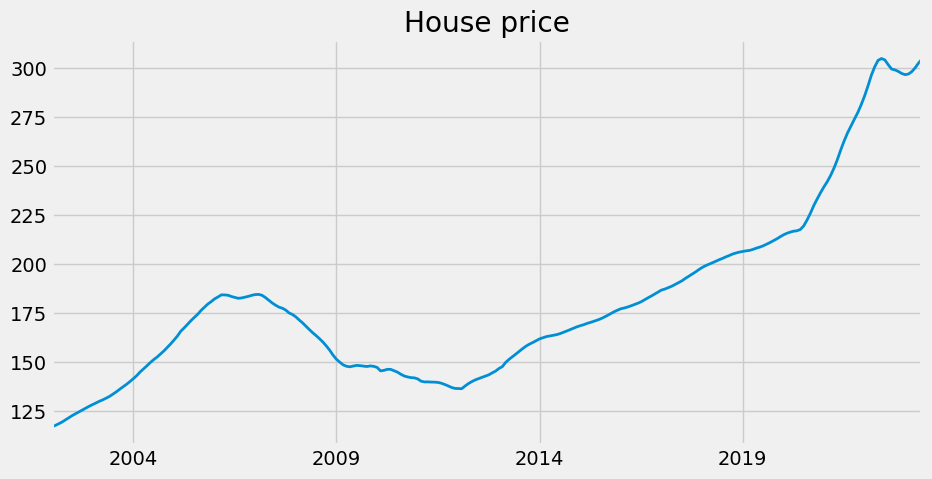

In [7]:
house_price = fred.get_series(series_id='CSUSHPISA', observation_start='2002-01-01', observation_end='2023-09-01')
house_price.plot(figsize=(10, 5), title='House price', lw=2)

In [8]:
house_price.info()

<class 'pandas.core.series.Series'>
DatetimeIndex: 258 entries, 2002-01-01 to 2023-06-01
Series name: None
Non-Null Count  Dtype  
--------------  -----  
258 non-null    float64
dtypes: float64(1)
memory usage: 4.0 KB


In [9]:
house_price.name = 'house_price'

In [10]:
house_price

2002-01-01    117.143
2002-02-01    117.845
2002-03-01    118.686
2002-04-01    119.610
2002-05-01    120.724
               ...   
2023-02-01    296.958
2023-03-01    298.210
2023-04-01    300.214
2023-05-01    302.657
2023-06-01    304.635
Name: house_price, Length: 258, dtype: float64

# Factor affecting us price

### Un Employment Rates

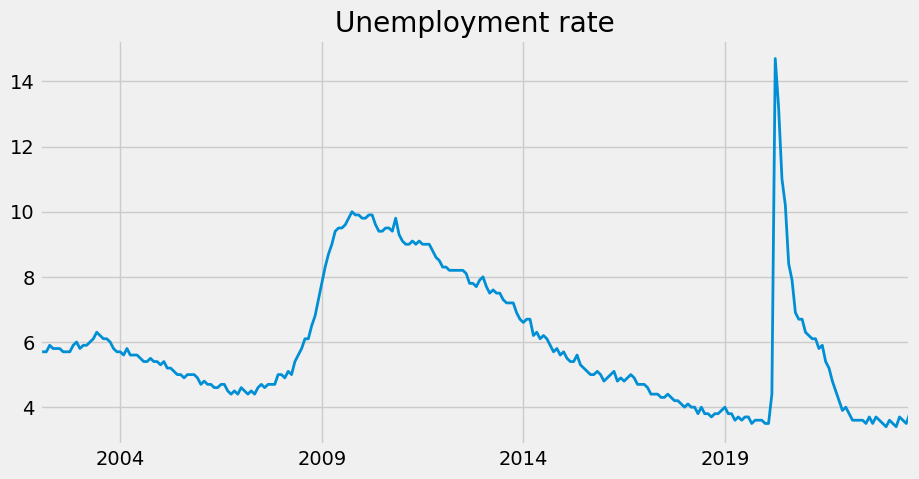

In [11]:
unemp_rate = fred.get_series(series_id='UNRATE', observation_start='2002-01-01', observation_end='2023-09-01')
unemp_rate.plot(figsize=(10, 5), title='Unemployment rate', lw=2);

In [12]:
unemp_rate.name = 'unemployment_rate'

### Interest Rate

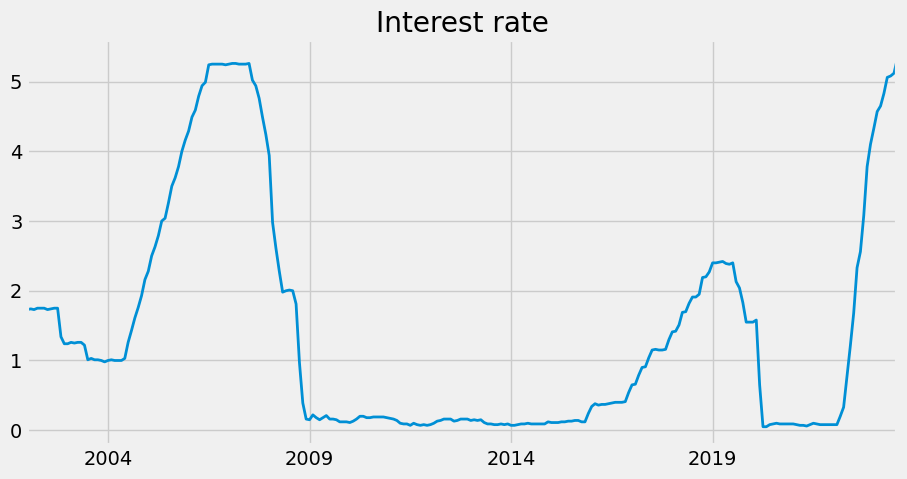

In [13]:
interest_rate = fred.get_series(series_id='FEDFUNDS', observation_start='2002-01-01', observation_end='2023-09-01')
interest_rate.plot(figsize=(10, 5), title='Interest rate', lw=2);

In [14]:
interest_rate.name = 'interest_rate'

### GDP Rate

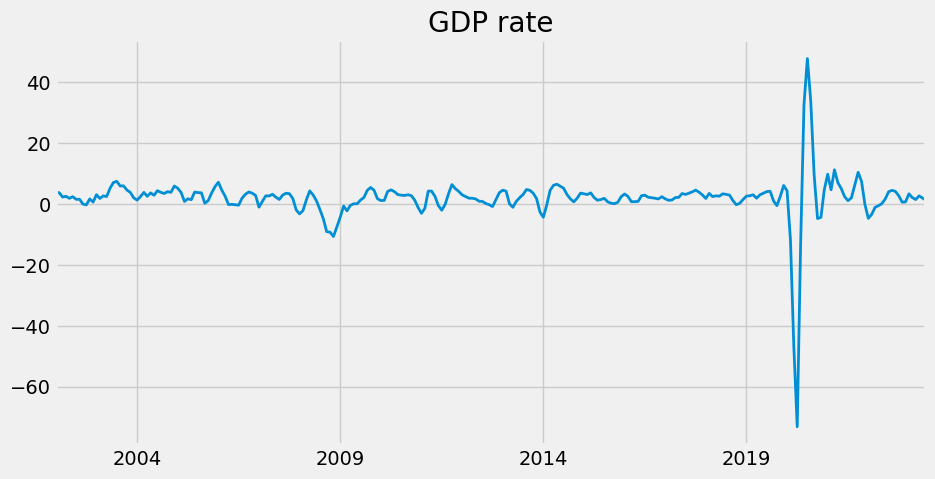

In [15]:
gdp_rate = fred.get_series(series_id='BBKMGDP', observation_start='2002-01-01', observation_end='2023-09-01')
gdp_rate.plot(figsize=(10, 5), title='GDP rate', lw=2);

In [16]:
gdp_rate.name = 'gdp_rate'

### Population growth

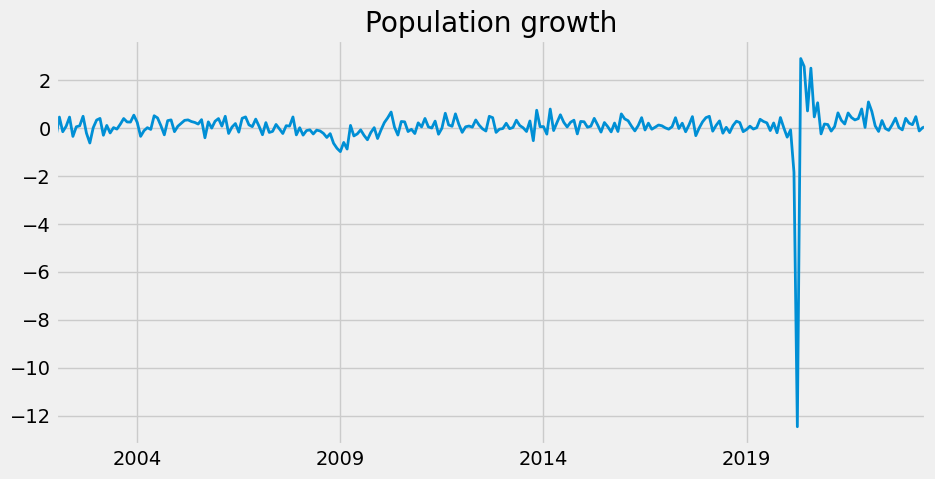

In [17]:
population_growth = fred.get_series(series_id='LFEM74MAUSM657S', observation_start='2002-01-01', observation_end='2023-09-01')
population_growth.plot(figsize=(10, 5), title='Population growth', lw=2);

In [18]:
population_growth.name = 'population_growth'

### Personel income

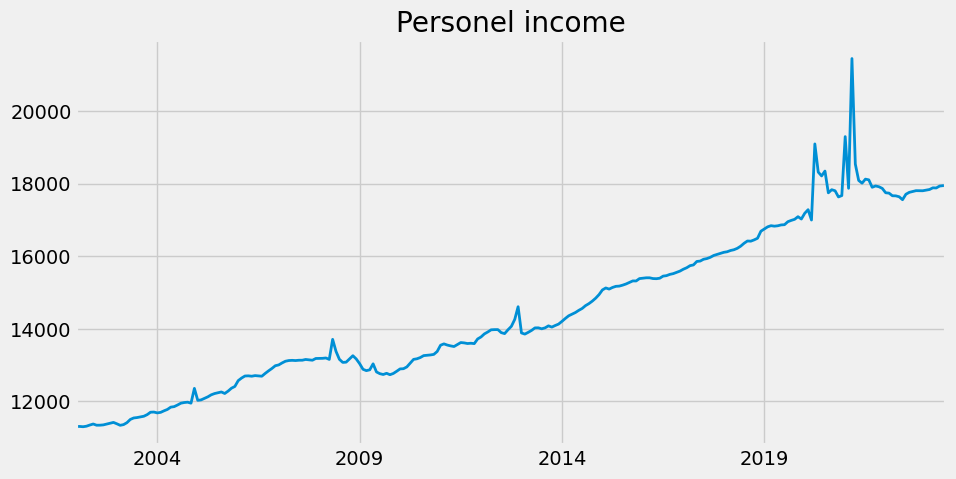

In [19]:
personel_income = fred.get_series(series_id='RPI', observation_start='2002-01-01', observation_end='2023-09-01')
personel_income.plot(figsize=(10, 5), title='Personel income', lw=2);

In [20]:
personel_income.name = 'personel_income'

### Fuel price

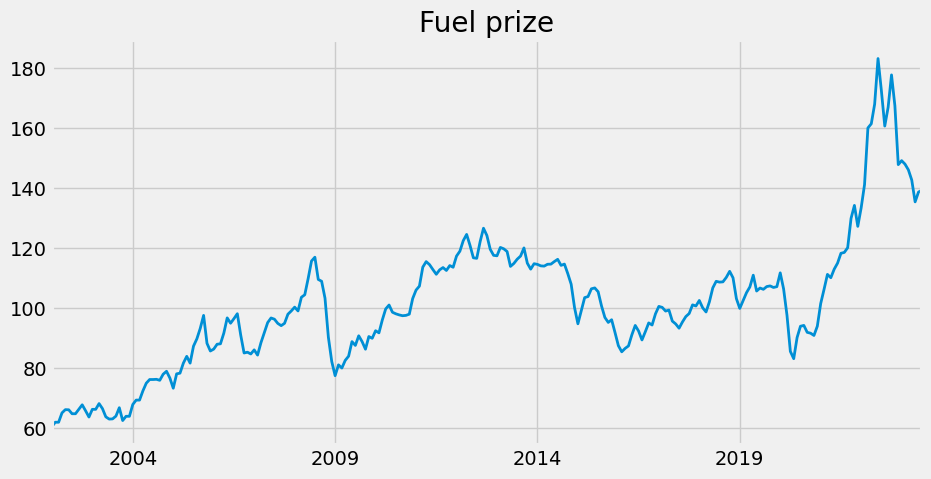

In [21]:
fuel = fred.get_series(series_id='CP0722LUM086NEST', observation_start='2002-01-01', observation_end='2023-09-01')
fuel.plot(figsize=(10, 5), title='Fuel prize', lw=2);

In [22]:
fuel.name = 'fuel'

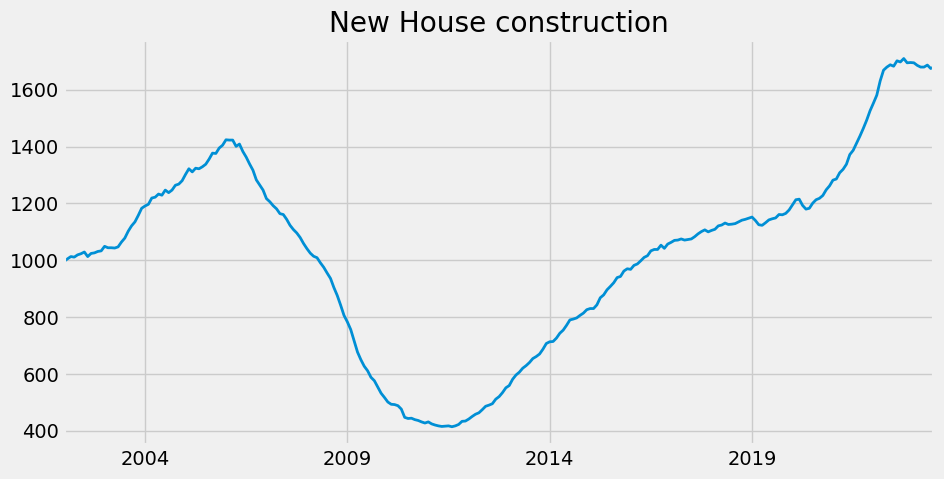

In [23]:
new_house = fred.get_series(series_id='UNDCONTSA', observation_start='2002-01-01', observation_end='2023-09-01')
new_house.plot(figsize=(10, 5), title='New House construction', lw=2);

In [24]:
new_house.name = 'new_house'

In [25]:
## Over all

In [26]:
df = pd.concat([gdp_rate,fuel, population_growth, personel_income, interest_rate,new_house,unemp_rate, house_price], axis = 1)

In [27]:
df

,gdp_rate,fuel,population_growth,personel_income,interest_rate,new_house,unemployment_rate,house_price
2002-01-01,3.925333,60.39,-0.366790,11310.671,1.73,996.0,5.7,117.143
2002-02-01,3.716188,61.89,0.458622,11310.978,1.74,1005.0,5.7,117.845
2002-03-01,2.301332,61.89,-0.153919,11303.416,1.73,1013.0,5.7,118.686
2002-04-01,2.535352,65.00,0.075302,11318.158,1.75,1011.0,5.9,119.610
2002-05-01,1.882535,66.09,0.457462,11350.189,1.75,1019.0,5.8,120.724
...,...,...,...,...,...,...,...,...
2023-04-01,2.691909,142.64,-0.121115,17882.300,4.83,1680.0,3.4,300.214
2023-05-01,1.970835,135.36,0.016208,17934.586,5.06,1687.0,3.7,302.657
2023-06-01,1.258246,138.62,0.068681,17946.111,5.08,1675.0,3.6,304.635
2023-07-01,NaN,139.24,NaN,17943.241,5.12,1681.0,3.5,NaN


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 260 entries, 2002-01-01 to 2023-08-01
Freq: MS
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gdp_rate           258 non-null    float64
 1   fuel               259 non-null    float64
 2   population_growth  258 non-null    float64
 3   personel_income    259 non-null    float64
 4   interest_rate      260 non-null    float64
 5   new_house          259 non-null    float64
 6   unemployment_rate  260 non-null    float64
 7   house_price        258 non-null    float64
dtypes: float64(8)
memory usage: 18.3 KB


In [29]:
df.dropna(inplace=True)

In [30]:
df

,gdp_rate,fuel,population_growth,personel_income,interest_rate,new_house,unemployment_rate,house_price
2002-01-01,3.925333,60.39,-0.366790,11310.671,1.73,996.0,5.7,117.143
2002-02-01,3.716188,61.89,0.458622,11310.978,1.74,1005.0,5.7,117.845
2002-03-01,2.301332,61.89,-0.153919,11303.416,1.73,1013.0,5.7,118.686
2002-04-01,2.535352,65.00,0.075302,11318.158,1.75,1011.0,5.9,119.610
2002-05-01,1.882535,66.09,0.457462,11350.189,1.75,1019.0,5.8,120.724
...,...,...,...,...,...,...,...,...
2023-02-01,2.126533,147.94,0.139364,17839.528,4.57,1686.0,3.6,296.958
2023-03-01,1.478337,146.04,0.475982,17885.887,4.65,1680.0,3.5,298.210
2023-04-01,2.691909,142.64,-0.121115,17882.300,4.83,1680.0,3.4,300.214
2023-05-01,1.970835,135.36,0.016208,17934.586,5.06,1687.0,3.7,302.657


In [31]:
df.index.name = 'ds'

In [32]:
df = df.reset_index()

In [33]:
df1 = df[['ds', 'house_price']]

In [34]:
df1 = df1.rename(columns = {'house_price' : 'y'})

In [35]:
df1

,ds,y
0,2002-01-01,117.143
1,2002-02-01,117.845
2,2002-03-01,118.686
3,2002-04-01,119.610
4,2002-05-01,120.724
...,...,...
253,2023-02-01,296.958
254,2023-03-01,298.210
255,2023-04-01,300.214
256,2023-05-01,302.657


In [36]:
# Python
m = Prophet()
m.fit(df1)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptqdycht7/00bmx2l9.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptqdycht7/gw22lqpi.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=20864', 'data', 'file=/tmp/tmptqdycht7/00bmx2l9.json', 'init=/tmp/tmptqdycht7/gw22lqpi.json', 'output', 'file=/tmp/tmptqdycht7/prophet_model7jaicf6g/prophet_model-20230906112147.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:21:47 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
11:21:47 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [37]:
# Python
future = m.make_future_dataframe(periods=365)
future.tail()

,ds
618,2024-05-27
619,2024-05-28
620,2024-05-29
621,2024-05-30
622,2024-05-31


In [38]:
# Python
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
618,2024-05-27,328.751375,321.626954,336.088707
619,2024-05-28,330.343033,323.210341,338.025688
620,2024-05-29,331.965065,324.651381,339.190062
621,2024-05-30,333.581067,325.856731,340.724006
622,2024-05-31,335.155470,328.071337,342.862509


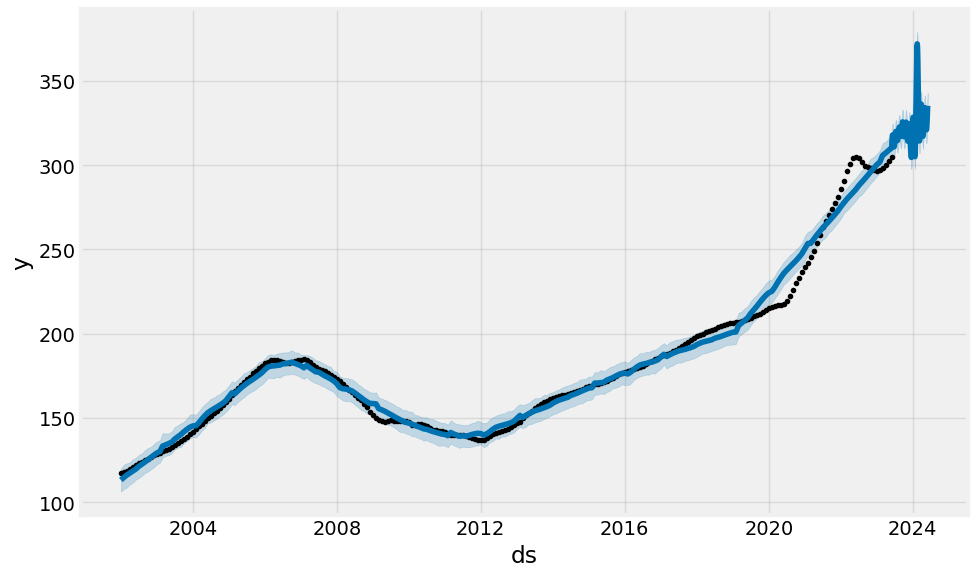

In [39]:
fig1 = m.plot(forecast)

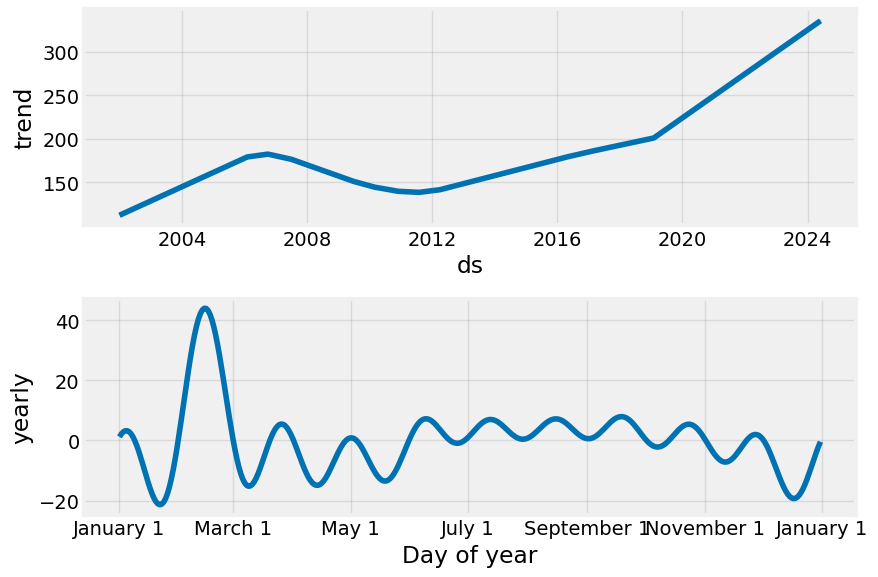

In [40]:
fig2 = m.plot_components(forecast)

### More Understanding of data

In [41]:
corr = df.corr()
corr.style.background_gradient(cmap='Greens')

<ipython-input-41-7b85637f58c7>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


,gdp_rate,fuel,population_growth,personel_income,interest_rate,new_house,unemployment_rate,house_price
gdp_rate,1.000000,-0.011834,0.713020,-0.009540,0.005732,0.028946,-0.081185,0.005109
fuel,-0.011834,1.000000,0.065060,0.644207,-0.044147,0.145203,-0.170235,0.670573
population_growth,0.713020,0.065060,1.000000,-0.002445,0.014971,0.042788,-0.187196,0.047956
personel_income,-0.009540,0.644207,-0.002445,1.000000,-0.156465,0.377709,-0.267628,0.833892
interest_rate,0.005732,-0.044147,0.014971,-0.156465,1.000000,0.563200,-0.537987,0.228893
new_house,0.028946,0.145203,0.042788,0.377709,0.563200,1.000000,-0.732643,0.736704
unemployment_rate,-0.081185,-0.170235,-0.187196,-0.267628,-0.537987,-0.732643,1.000000,-0.502629
house_price,0.005109,0.670573,0.047956,0.833892,0.228893,0.736704,-0.502629,1.000000


In [42]:
df.describe()

,gdp_rate,fuel,population_growth,personel_income,interest_rate,new_house,unemployment_rate,house_price
count,258.000000,258.000000,258.000000,258.000000,258.000000,258.000000,258.000000,258.000000
mean,1.987071,100.773643,0.064273,14462.617054,1.398876,1019.872093,5.943798,180.716891
std,7.529231,22.314599,0.892378,2161.219846,1.610927,341.742176,1.997445,45.549936
min,-73.107529,60.390000,-12.468330,11303.416000,0.050000,414.000000,3.400000,117.143000
25%,0.863749,87.927500,-0.108350,12844.777500,0.122500,774.000000,4.500000,147.470000
50%,2.462756,98.970000,0.077506,13965.742500,0.905000,1070.500000,5.450000,171.328500
75%,3.788099,113.327500,0.294185,16120.662250,2.007500,1226.500000,7.125000,198.981750
max,47.769919,183.140000,2.901868,21448.063000,5.260000,1710.000000,14.700000,304.817000


In [43]:
df_nn = df.copy()

In [44]:
df_nn

,ds,gdp_rate,fuel,population_growth,personel_income,interest_rate,new_house,unemployment_rate,house_price
0,2002-01-01,3.925333,60.39,-0.366790,11310.671,1.73,996.0,5.7,117.143
1,2002-02-01,3.716188,61.89,0.458622,11310.978,1.74,1005.0,5.7,117.845
2,2002-03-01,2.301332,61.89,-0.153919,11303.416,1.73,1013.0,5.7,118.686
3,2002-04-01,2.535352,65.00,0.075302,11318.158,1.75,1011.0,5.9,119.610
4,2002-05-01,1.882535,66.09,0.457462,11350.189,1.75,1019.0,5.8,120.724
...,...,...,...,...,...,...,...,...,...
253,2023-02-01,2.126533,147.94,0.139364,17839.528,4.57,1686.0,3.6,296.958
254,2023-03-01,1.478337,146.04,0.475982,17885.887,4.65,1680.0,3.5,298.210
255,2023-04-01,2.691909,142.64,-0.121115,17882.300,4.83,1680.0,3.4,300.214
256,2023-05-01,1.970835,135.36,0.016208,17934.586,5.06,1687.0,3.7,302.657


In [45]:
dep_var = 'house_price'

In [46]:
df[dep_var] = np.log(df[dep_var])

In [47]:
df = add_datepart(df, 'ds')

In [48]:
df

,gdp_rate,fuel,population_growth,personel_income,interest_rate,new_house,unemployment_rate,house_price,dsYear,dsMonth,...,dsDay,dsDayofweek,dsDayofyear,dsIs_month_end,dsIs_month_start,dsIs_quarter_end,dsIs_quarter_start,dsIs_year_end,dsIs_year_start,dsElapsed
0,3.925333,60.39,-0.366790,11310.671,1.73,996.0,5.7,4.763395,2002,1,...,1,1,1,False,True,False,True,False,True,1.009843e+09
1,3.716188,61.89,0.458622,11310.978,1.74,1005.0,5.7,4.769370,2002,2,...,1,4,32,False,True,False,False,False,False,1.012522e+09
2,2.301332,61.89,-0.153919,11303.416,1.73,1013.0,5.7,4.776481,2002,3,...,1,4,60,False,True,False,False,False,False,1.014941e+09
3,2.535352,65.00,0.075302,11318.158,1.75,1011.0,5.9,4.784236,2002,4,...,1,0,91,False,True,False,True,False,False,1.017619e+09
4,1.882535,66.09,0.457462,11350.189,1.75,1019.0,5.8,4.793507,2002,5,...,1,2,121,False,True,False,False,False,False,1.020211e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253,2.126533,147.94,0.139364,17839.528,4.57,1686.0,3.6,5.693591,2023,2,...,1,2,32,False,True,False,False,False,False,1.675210e+09
254,1.478337,146.04,0.475982,17885.887,4.65,1680.0,3.5,5.697798,2023,3,...,1,2,60,False,True,False,False,False,False,1.677629e+09
255,2.691909,142.64,-0.121115,17882.300,4.83,1680.0,3.4,5.704496,2023,4,...,1,5,91,False,True,False,True,False,False,1.680307e+09
256,1.970835,135.36,0.016208,17934.586,5.06,1687.0,3.7,5.712600,2023,5,...,1,0,121,False,True,False,False,False,False,1.682899e+09


In [49]:
df.columns

Index(['gdp_rate', 'fuel', 'population_growth', 'personel_income',
       'interest_rate', 'new_house', 'unemployment_rate', 'house_price',
       'dsYear', 'dsMonth', 'dsWeek', 'dsDay', 'dsDayofweek', 'dsDayofyear',
       'dsIs_month_end', 'dsIs_month_start', 'dsIs_quarter_end',
       'dsIs_quarter_start', 'dsIs_year_end', 'dsIs_year_start', 'dsElapsed'],
      dtype='object')

In [50]:
cond = (df.dsYear<2020)
train_idx = np.where( cond)[0]
valid_idx = np.where(~cond)[0]

splits = (list(train_idx),list(valid_idx))

In [51]:
cont,cat = cont_cat_split(df, 1, dep_var=dep_var)

In [52]:
procs = [Categorify, FillMissing, Normalize]


In [53]:
to = TabularPandas(df, procs, cat, cont, y_names=dep_var, splits=splits)

In [54]:
len(to.train),len(to.valid)

(216, 42)

In [55]:
to.show(3)

,dsDay,dsIs_month_end,dsIs_month_start,dsIs_quarter_end,dsIs_quarter_start,dsIs_year_end,dsIs_year_start,gdp_rate,fuel,population_growth,personel_income,interest_rate,new_house,unemployment_rate,dsYear,dsMonth,dsWeek,dsDayofweek,dsDayofyear,dsElapsed,house_price
0,1,False,True,False,True,False,True,3.925333,60.389999,-0.366790,11310.670898,1.73,996.0,5.7,2002.0,1.0,1.0,1.0,1.0,1.009843e+09,4.763395
1,1,False,True,False,False,False,False,3.716188,61.889999,0.458622,11310.977539,1.74,1005.0,5.7,2002.0,2.0,5.0,4.0,32.0,1.012522e+09,4.769370
2,1,False,True,False,False,False,False,2.301332,61.889999,-0.153919,11303.416016,1.73,1013.0,5.7,2002.0,3.0,9.0,4.0,60.0,1.014941e+09,4.776481


In [56]:
to.items.head(3)

,gdp_rate,fuel,population_growth,personel_income,interest_rate,new_house,unemployment_rate,house_price,dsYear,dsMonth,...,dsDay,dsDayofweek,dsDayofyear,dsIs_month_end,dsIs_month_start,dsIs_quarter_end,dsIs_quarter_start,dsIs_year_end,dsIs_year_start,dsElapsed
0,0.712957,-2.133021,-1.488018,-1.532676,0.196572,0.209178,-0.193387,4.763395,-1.638356,-1.593255,...,1,-1.009890,-1.586477,1,1,1,2,1,2,-1.723612
1,0.632988,-2.042333,1.365261,-1.532486,0.202913,0.239817,-0.193387,4.769370,-1.638356,-1.303572,...,1,0.487613,-1.291425,1,1,1,1,1,1,-1.707278
2,0.092002,-2.042333,-0.752167,-1.537183,0.196572,0.267052,-0.193387,4.776481,-1.638356,-1.013890,...,1,0.487613,-1.024926,1,1,1,1,1,1,-1.692524


In [57]:
save_pickle('to.pkl',to)


In [58]:
to = load_pickle('to.pkl')

In [59]:
xs,y = to.train.xs,to.train.y
valid_xs,valid_y = to.valid.xs,to.valid.y

In [60]:
def r_mse(pred,y): return round(math.sqrt(((pred-y)**2).mean()), 6)
def m_rmse(m, xs, y): return r_mse(m.predict(xs), y)

In [61]:
def rf(xs, y, n_estimators=40, max_samples=70,
       max_features=0.5, min_samples_leaf=5, **kwargs):
    return RandomForestRegressor(n_jobs=-1, n_estimators=n_estimators,
        max_samples=max_samples, max_features=max_features,
        min_samples_leaf=min_samples_leaf, oob_score=True).fit(xs, y)

In [62]:
m = rf(xs, y);

In [63]:
m_rmse(m, xs, y), m_rmse(m, valid_xs, valid_y)

(0.022975, 0.34372)

In [64]:
preds = np.stack([t.predict(valid_xs) for t in m.estimators_])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without featu

In [65]:
r_mse(preds.mean(0), valid_y)

0.34372

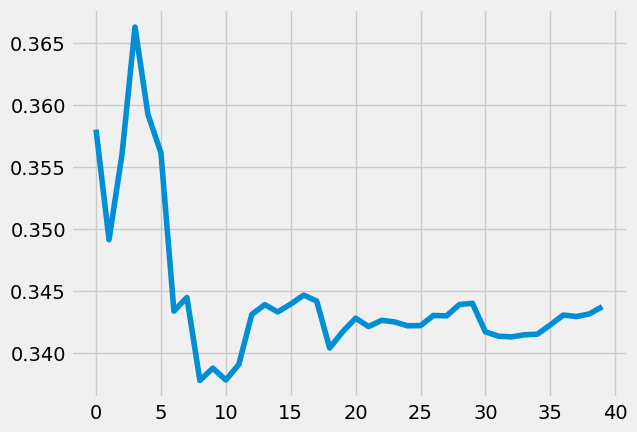

In [66]:
plt.plot([r_mse(preds[:i+1].mean(0), valid_y) for i in range(40)]);

In [67]:
r_mse(m.oob_prediction_, y)

0.025719

In [68]:
def rf_feat_importance(m, df):
    return pd.DataFrame({'cols':df.columns, 'imp':m.feature_importances_}
                       ).sort_values('imp', ascending=False)


In [69]:
fi = rf_feat_importance(m, xs)
fi[:10]

,cols,imp
13,unemployment_rate,0.558656
19,dsElapsed,0.117720
10,personel_income,0.112142
14,dsYear,0.070584
11,interest_rate,0.056140
8,fuel,0.045865
12,new_house,0.033869
7,gdp_rate,0.002392
9,population_growth,0.001493
15,dsMonth,0.000302


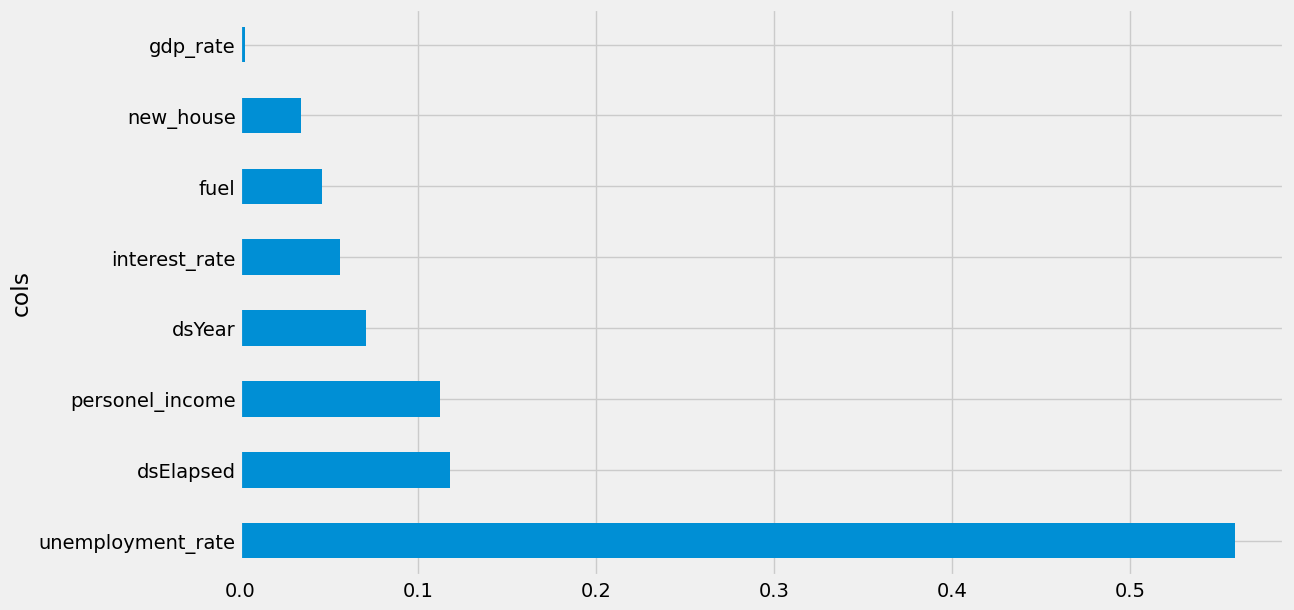

In [70]:
def plot_fi(fi):
    return fi.plot('cols', 'imp', 'barh', figsize=(12,7), legend=False)

plot_fi(fi[:8]);

In [71]:
to_keep = fi[fi.imp>0.005].cols
len(to_keep)

7

In [72]:
xs_imp = xs[to_keep]
valid_xs_imp = valid_xs[to_keep]

In [73]:
m = rf(xs_imp, y)

In [74]:
m_rmse(m, xs_imp, y), m_rmse(m, valid_xs_imp, valid_y)

(0.019704, 0.325817)

In [75]:
len(xs.columns), len(xs_imp.columns)

(20, 7)

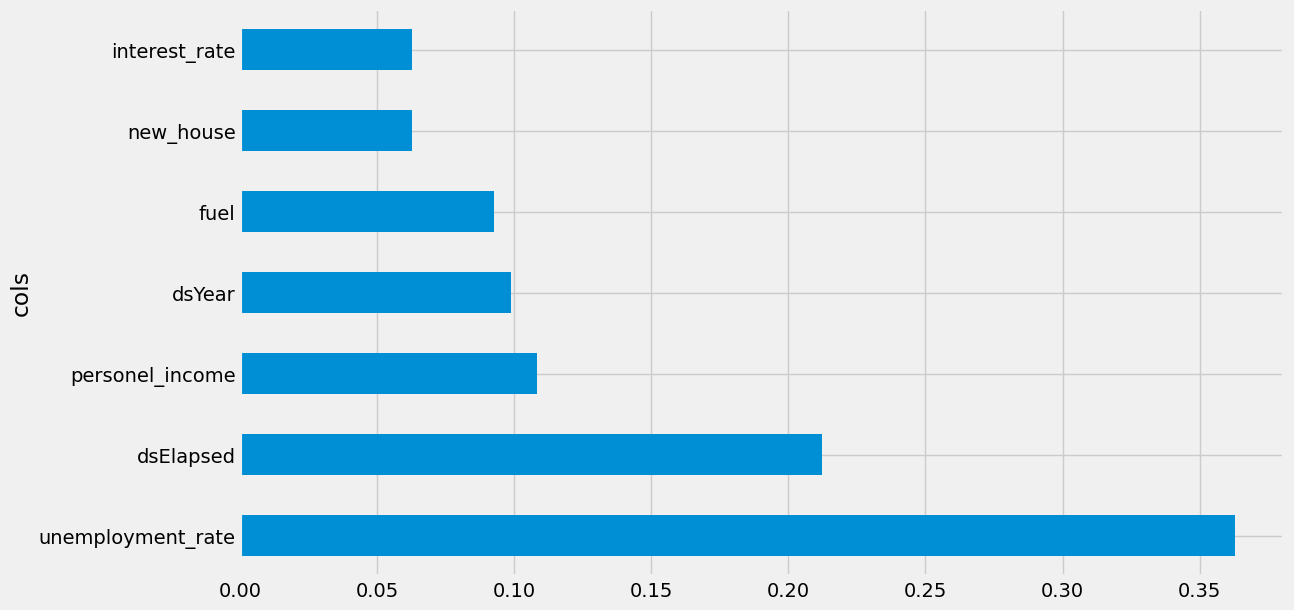

In [76]:
plot_fi(rf_feat_importance(m, xs_imp));

In [77]:
df_nn

,ds,gdp_rate,fuel,population_growth,personel_income,interest_rate,new_house,unemployment_rate,house_price
0,2002-01-01,3.925333,60.39,-0.366790,11310.671,1.73,996.0,5.7,117.143
1,2002-02-01,3.716188,61.89,0.458622,11310.978,1.74,1005.0,5.7,117.845
2,2002-03-01,2.301332,61.89,-0.153919,11303.416,1.73,1013.0,5.7,118.686
3,2002-04-01,2.535352,65.00,0.075302,11318.158,1.75,1011.0,5.9,119.610
4,2002-05-01,1.882535,66.09,0.457462,11350.189,1.75,1019.0,5.8,120.724
...,...,...,...,...,...,...,...,...,...
253,2023-02-01,2.126533,147.94,0.139364,17839.528,4.57,1686.0,3.6,296.958
254,2023-03-01,1.478337,146.04,0.475982,17885.887,4.65,1680.0,3.5,298.210
255,2023-04-01,2.691909,142.64,-0.121115,17882.300,4.83,1680.0,3.4,300.214
256,2023-05-01,1.970835,135.36,0.016208,17934.586,5.06,1687.0,3.7,302.657


In [78]:
df_nn = add_datepart(df_nn, 'ds')

In [79]:
df_nn.columns

Index(['gdp_rate', 'fuel', 'population_growth', 'personel_income',
       'interest_rate', 'new_house', 'unemployment_rate', 'house_price',
       'dsYear', 'dsMonth', 'dsWeek', 'dsDay', 'dsDayofweek', 'dsDayofyear',
       'dsIs_month_end', 'dsIs_month_start', 'dsIs_quarter_end',
       'dsIs_quarter_start', 'dsIs_year_end', 'dsIs_year_start', 'dsElapsed'],
      dtype='object')

In [80]:
df_nn = df_nn[['fuel', 'population_growth',
       'interest_rate', 'new_house', 'unemployment_rate', 'house_price',
       'dsYear', 'dsElapsed']]

In [81]:
cont_nn,cat_nn = cont_cat_split(df_nn, max_card=9000, dep_var=dep_var)

In [82]:
cont_nn,cat_nn

(['fuel',
  'population_growth',
  'interest_rate',
  'new_house',
  'unemployment_rate',
  'dsElapsed'],
 ['dsYear'])

In [83]:
procs_nn = [Categorify, FillMissing, Normalize]
to_nn = TabularPandas(df_nn, procs_nn, cat_nn, cont_nn,
                      splits=splits, y_names=dep_var)


In [84]:
dls = to_nn.dataloaders(32)

In [85]:
y = to_nn.train.y
y.min(),y.max()

(117.143, 213.906)

In [86]:
learn = tabular_learner(dls, y_range=(8,12), layers=[500,250],
                        n_out=1, loss_func=F.mse_loss)

SuggestedLRs(valley=0.14454397559165955)

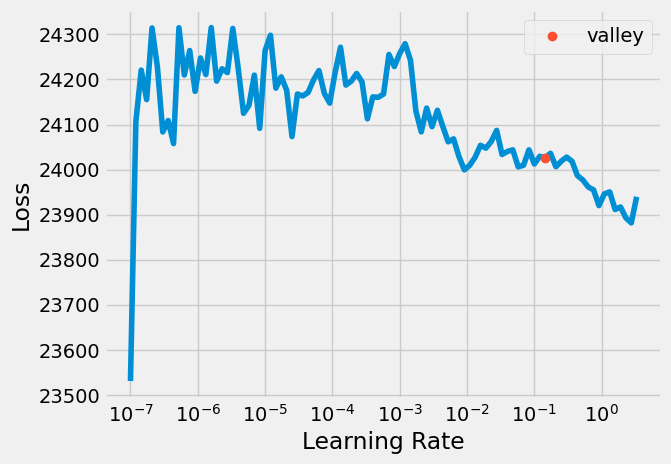

In [87]:
learn.lr_find()

In [88]:
learn.fit_one_cycle(5, 1e-2)

epoch,train_loss,valid_loss,time
0,24015.992188,66338.179688,00:00
1,23991.326172,65808.101562,00:00
2,23924.181641,65861.093750,00:00
3,23845.916016,65891.968750,00:00
4,23807.599609,65918.703125,00:00


In [89]:
preds,targs = learn.get_preds()
r_mse(preds,targs)

256.746364

In [90]:
learn.save('nn')

Path('models/nn.pth')